In [1]:
import numpy as np
import pandas as pd
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re
import os
import csv

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data=pd.read_csv("all_kindle_review .csv")

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [4]:
data.shape

(12000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         12000 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [6]:
data.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "helpful", "reviewTime", "reviewerID", "reviewerName", "unixReviewTime"], inplace= True)

In [7]:
data.head()

,asin,rating,reviewText,summary
0,B0033UV8HI,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average
1,B002HJV4DE,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!
2,B002ZG96I4,3,I'll start by saying this is the first of four...,Snapdragon Alley
3,B002QHWOEU,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy
4,B001A06VJ8,4,I did not expect this type of book to be in li...,Book


In [8]:
data.describe()

,rating
count,12000.000000
mean,3.250000
std,1.421619
min,1.000000
25%,2.000000
50%,3.500000
75%,4.250000
max,5.000000


In [9]:
data.isnull().sum()

asin          0
rating        0
reviewText    0
summary       0
dtype: int64

In [10]:
data.shape

(12000, 4)

In [11]:
data["asin"].nunique()

2114

In [12]:
data["rating"].value_counts()

5    3000
4    3000
3    2000
2    2000
1    2000
Name: rating, dtype: int64

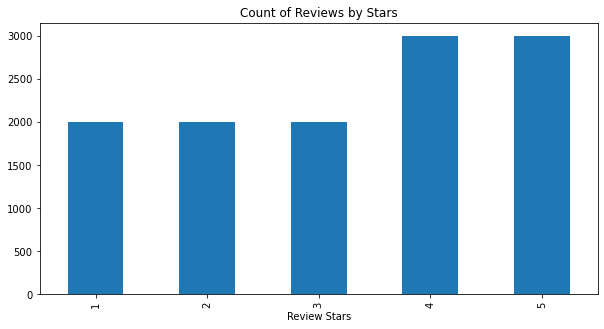

In [13]:
import matplotlib.pyplot as plt
ax = data["rating"].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

### Imputing rating value


In [14]:
data["rating"] = np.where((data["rating"] < 3), 0, data.rating)
data["rating"] = np.where((data["rating"] >= 3), 1, data.rating)

In [15]:
data

,asin,rating,reviewText,summary
0,B0033UV8HI,1,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average
1,B002HJV4DE,1,Great short read. I didn't want to put it dow...,Terrific menage scenes!
2,B002ZG96I4,1,I'll start by saying this is the first of four...,Snapdragon Alley
3,B002QHWOEU,1,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy
4,B001A06VJ8,1,I did not expect this type of book to be in li...,Book
...,...,...,...,...
11995,B001DUGORO,1,Valentine cupid is a vampire- Jena and Ian ano...,jena
11996,B002JCSFSQ,1,I have read all seven books in this series. Ap...,Peacekeepers Series
11997,B0035N1V7K,1,This book really just wasn't my cuppa. The si...,a little creepy
11998,B001W1XT40,0,"tried to use it to charge my kindle, it didn't...",didn't work


In [16]:
data["word-count"] = data["reviewText"].str.split().str.len()

In [17]:
data

,asin,rating,reviewText,summary,word-count
0,B0033UV8HI,1,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average,541
1,B002HJV4DE,1,Great short read. I didn't want to put it dow...,Terrific menage scenes!,69
2,B002ZG96I4,1,I'll start by saying this is the first of four...,Snapdragon Alley,76
3,B002QHWOEU,1,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy,54
4,B001A06VJ8,1,I did not expect this type of book to be in li...,Book,20
...,...,...,...,...,...
11995,B001DUGORO,1,Valentine cupid is a vampire- Jena and Ian ano...,jena,28
11996,B002JCSFSQ,1,I have read all seven books in this series. Ap...,Peacekeepers Series,113
11997,B0035N1V7K,1,This book really just wasn't my cuppa. The si...,a little creepy,78
11998,B001W1XT40,0,"tried to use it to charge my kindle, it didn't...",didn't work,28


In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0.5, 1.0, 'Average no. of words vs rating')

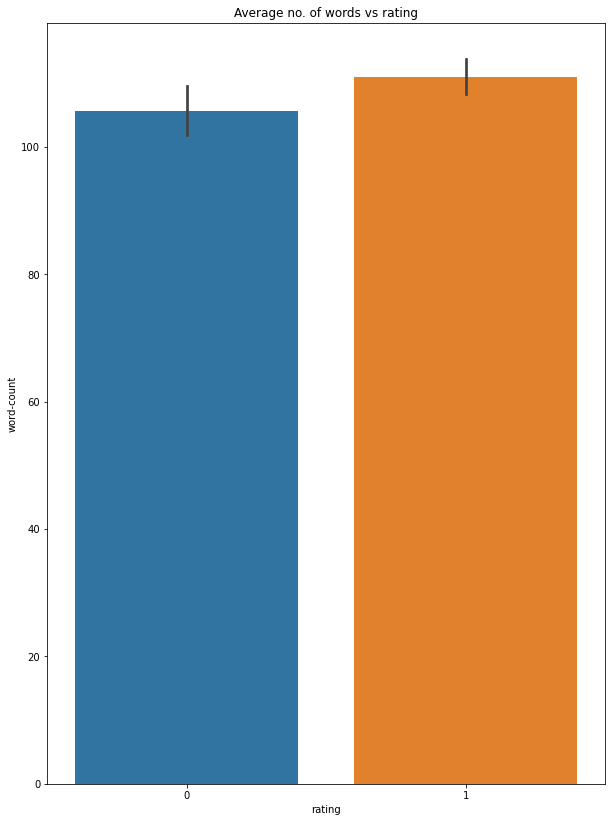

In [19]:
plt.figure(figsize=(10,14))
sns.barplot(x= "rating", y="word-count", data=data)
plt.title("Average no. of words vs rating")

In [20]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data ,test_size=0.2)

In [21]:
print(train.shape)
print(test.shape)

(9600, 5)
(2400, 5)


In [22]:
!pip install inflect
import inflect
import gensim
import string
p=inflect.engine()

In [23]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [24]:
# Remove html tag
def clean_html(text):
    clean = re.compile("<.*?>")
    return re.sub(clean, '', text)

In [25]:
# COnvert to lowercase
def convert_lower(text):
    return text.lower()

In [26]:
# Remove square barckets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [27]:
# Remove special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [28]:
# Remove emails
def remove_emails(text):
    pattern=r"\S+@\S+"
    text=re.sub(pattern,'',text)
    return text

In [29]:
from nltk.tokenize.toktok import ToktokTokenizer

In [30]:
#set stopwords to english
stopword_list=nltk.corpus.stopwords.words('english')
stop=set(stopwords.words('english'))
tokenizer=ToktokTokenizer()
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


In [31]:
# Denoise the data
def denoise_text(text):
    text = clean_html(text)
    text = convert_lower(text)
    text = remove_between_square_brackets(text)
    text = remove_emoji(text)
    text = remove_special_characters(text)
    text = remove_emails(text)
    text = remove_stopwords(text)
    return text

In [32]:
data['reviewText']=data["reviewText"].apply(denoise_text)
data["reviewText"]

0        jace rankin may short hes nothing mess man hau...
1        great short read didnt want put read one sitti...
2        ill start saying first four books wasnt expect...
3        aggie angela lansbury carries pocketbooks inst...
4        expect type book library pleased find price right
                               ...                        
11995    valentine cupid vampire jena ian another vampi...
11996    read seven books series apocalypticadventure o...
11997    book really wasnt cuppa situation man capturin...
11998    tried use charge kindle didnt even register ch...
11999    taking instruction look often hidden world sex...
Name: reviewText, Length: 12000, dtype: object

In [33]:
train["reviewText"] 

10017    I was a bit skeptical about reading this book....
4862     John Carter was one of my first introductions ...
6516     Clarissa Barnes is heading to the badlands of ...
2947     What a disappointment. I thought it would be a...
5662     This free short story just didn't do it for me...
                               ...                        
5630     The basic set up - King Henry VIII didn't die,...
10388    This was really fun read. It was also hot! It'...
4960     i thoroughly enjoyed reading the book called T...
7386     I enjoyed reading this sweet story. I wish the...
5690     Wow hot sex and great story line. Was so happy...
Name: reviewText, Length: 9600, dtype: object

In [34]:
train["reviewText"] = train["reviewText"].apply(denoise_text)
train["reviewText"]

10017    bit skeptical reading book book description if...
4862     john carter one first introductions reading sc...
6516     clarissa barnes heading badlands south dakota ...
2947     disappointment thought would nice christmas ro...
5662     free short story didnt read share short erotic...
                               ...                        
5630     basic set king henry viii didnt die went secre...
10388    really fun read also hot valentines day day we...
4960     thoroughly enjoyed reading book called two sig...
7386     enjoyed reading sweet story wish story longer ...
5690     wow hot sex great story line happy sister ende...
Name: reviewText, Length: 9600, dtype: object

In [35]:
test["reviewText"] = test["reviewText"].apply(denoise_text)
test["reviewText"]

5758     want book nearly singe eyebrows heated content...
657      always love get newspaper kindle really enjoy ...
10693    novels story began well starts drag finish rea...
3101     loved book miranda wonderful innocent girl unc...
6454     read less hour continued read realized short s...
                               ...                        
8342     kidding might absolute worst book ever read ca...
6238     loved 5th book favorite love version vampires ...
8267     lds book covers need review many years since i...
6571     nice little story follow series loved getting ...
5227     enjoyed character development especially bias ...
Name: reviewText, Length: 2400, dtype: object

In [36]:
nltk.download("vader_lexicon")
from nltk.sentiment import SentimentIntensityAnalyzer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [38]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [39]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    reviewText = row['reviewText']
    asin = row['asin']
    res[asin] = sia.polarity_scores(reviewText)

  0%|          | 0/12000 [00:00<?, ?it/s]

In [40]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'asin'})
vaders = vaders.merge(data, how='left')
vaders.tail()

,asin,neg,neu,pos,compound,rating,reviewText,summary,word-count
11995,B002LLNFDA,0.025,0.620,0.355,0.9788,1,thought figured first third book nope second t...,Dawn Judd is fantastic at creating the twist!,125
11996,B0040JI3P6,0.115,0.829,0.056,-0.2975,0,plot book well thought little formula found pe...,First book?,74
11997,B002KFD0VY,0.075,0.607,0.318,0.9966,1,good nicole kimberlings writing incredibly smo...,Beautiful world building and writing,392
11998,B003VYBFZQ,0.000,0.661,0.339,0.8957,0,think main goal sell books get greeting card b...,There are better ones with more personality.,55
11999,B003YDXKB6,0.097,0.603,0.301,0.8795,0,total crap written characters iq maturity 14 y...,This book was crap,76


In [41]:
vaders.shape

(12000, 9)

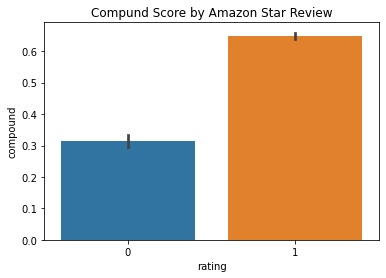

In [42]:
ax = sns.barplot(data=vaders, x="rating", y="compound")
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

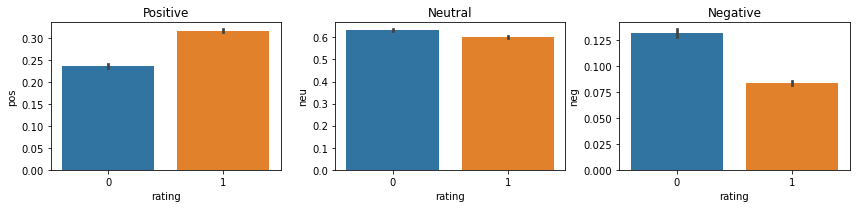

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x="rating", y='pos', ax=axs[0])
sns.barplot(data=vaders, x="rating", y='neu', ax=axs[1])
sns.barplot(data=vaders, x="rating", y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Roberta Pretrained Model 

In [97]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [100]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

RuntimeError: Failed to import transformers.models.roberta.modeling_roberta because of the following error (look up to see its traceback):
DLL load failed while importing _C: The specified module could not be found.

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
      text = row['reviewText']
    asin = row['asin']
      res[asin] = polarity_scores_roberta(reviewText)

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'asin'})
results_df = results_df.merge(vaders, how='left')

In [ ]:
results_df.columns

In [ ]:
results_df.rename(columns = {'neg':'vader_neg', 'neu':'vader_neu',
                              'pos':'vader_pos'}, inplace = True)
results_df.columns

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

In [ ]:
results_df.query('rating == 1') \
    .sort_values('roberta_pos', ascending=False)['reviewText'].values[0]

In [ ]:
results_df.query('rating == 1') \
    .sort_values('vader_pos', ascending=False)['reviewText'].values[0]

In [ ]:
results_df.query('rating == 5') \
    .sort_values('roberta_neg', ascending=False)['reviewText'].values[0]

In [ ]:
results_df.query('rating == 5') \
    .sort_values('vader_neg', ascending=False)['reviewText'].values[0]